# Final Project

In [358]:
import sys
sys.path.append("C:/Users/sumit/OneDrive/Escritorio/Universidad/aprendizaje-automatico-IBM/venv/Lib/site-packages")

In [422]:
import warnings
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
output_notebook()

sns.set_context('notebook')
%matplotlib inline

Loading BokehJS ...

Required

Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company. **✓**

**Sections required in your report:**

- Brief description of the data set you chose and a summary of its attributes. **✓**

- Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation. **✓**

- Brief summary of data exploration and actions taken for data cleaning and feature engineering. **✓**
    - Data Retrieving **✓**
    - Actions taken for data cleaning **✓**
        - Duplicate samples **✓**
        - Outliers treatment **✓**
    - Simple Data Exploration (EDA) **✓**
    - Feature Engineering **✓**
    - Advanced Data Exploration (EDA) **✓**

- Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method:
    - Simple regression **✓**
    - Simple regression with polynomial effects **✓**
    - Lasso or Ridge regression with polynomial effects **✓**

- A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability. **✓**

- Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model. **✓**

- Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction. **✓**

## Brief description of the data set and a summary of its attributes

**Dataset name:**

Medical Cost Personal Datasets

Insurance Forecast by using Linear Regression

**Description:**

The dataset consists of insurance charges for different types of persons.

**Summary of attributes:**

The dataset contains 7 variables (1 boolea, 2 strings and 4 decimals)

- **Age:** age of primary beneficiary.
- **Sex:** insurance contractor gender, female, male.
- **BMI:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
- **Children:** number of children covered by health insurance / Number of dependents.
- **Smoker:** smoking
- **Region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- **Charges:** Individual medical costs billed by health insurance.

## Model focused on prediction or interpretation

This notebook will provide some linear regression models aimed at **predicting the insurance charges**.

## Brief summary of data exploration and actions taken for data cleaning and feature engineering.

### Data Retrieving

First look to our data from a .csv file

In [360]:
file_path = '../datasets/insurance.csv'

insurance_df = pd.read_csv(file_path)

insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [361]:
# Number of data points:
print("Data points:", insurance_df.shape[0])
print("------------------------------------------------------------------------------------------------------------------")

# Column names:
print("Column names:", list(insurance_df.columns))
print("------------------------------------------------------------------------------------------------------------------")

# Data type of each column
print("Column types:")
print(insurance_df.dtypes)

Data points: 1338
------------------------------------------------------------------------------------------------------------------
Column names: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
------------------------------------------------------------------------------------------------------------------
Column types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


### Actions taken for data cleaning

#### Duplicate samples

As can be seen there is a duplicate sample, we proceed to eliminate it.

In [362]:
insurance_df.loc[insurance_df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [363]:
insurance_df.drop(581, inplace=True)
insurance_df.reset_index(inplace=True, drop=True)

In [364]:
insurance_df[580:585]

,age,sex,bmi,children,smoker,region,charges
580,59,male,25.46,1,no,northeast,12913.99240
581,39,male,45.43,2,no,southeast,6356.27070
582,32,female,23.65,1,no,southeast,17626.23951
583,19,male,20.70,0,no,southwest,1242.81600
584,33,female,28.27,1,no,southeast,4779.60230


As next step we look at the information in each of the columns of our data set

**As can be seen, there are no missing data in our data set. This is because the dataset is already clean since its download.**

In case we found null values there are three methods we can approach:
- Removing
- Imputing
- Masking

In [365]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


#### Outliers Treatment

For the treatment of the outliers we start by visualizing the boxplots of our numerical variables.

In [366]:
numerical_cols = list(insurance_df.select_dtypes(exclude=object).columns)
categorical_cols = list(insurance_df.select_dtypes(object).columns)

print("numercial_cols", numerical_cols)
print("categorical_cols", categorical_cols)

numercial_cols ['age', 'bmi', 'children', 'charges']
categorical_cols ['sex', 'smoker', 'region']


As can be seen, the variables: **age** and **children** do not show any outlier. However, the variables: **BMI** and **charges** do.

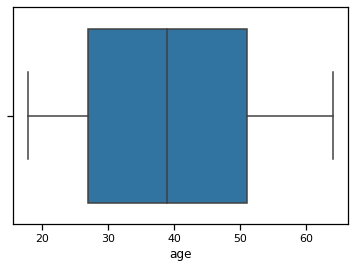

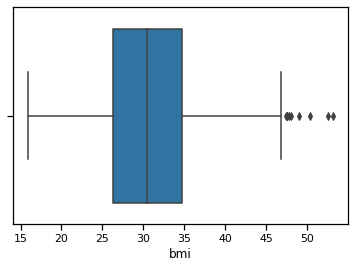

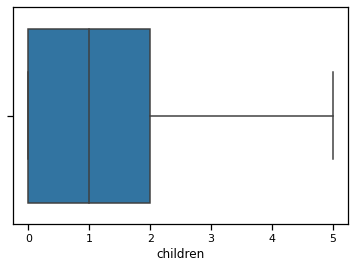

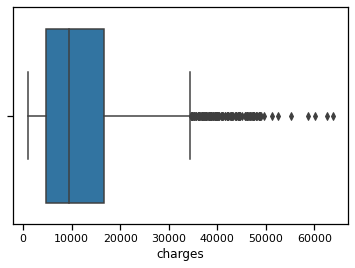

In [367]:
for i in numerical_cols:
    plt.figure()
    sns.boxplot(x=insurance_df[i])

Before proceeding with the treatment of these outliers, let us look at the number of outliers for each of the numerical variables.

So there are 139 outliers values for the **charges** variable, which represents about 10% of all population. The decision is to not remove them because they are not so discrepant from the average values and they probably are a natual part of the population we are studying.

In [368]:
Q1 = insurance_df[numerical_cols].quantile(0.25)
Q3 = insurance_df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

print('INITIAL NUMBER OF OUTLIERS:')

((insurance_df[numerical_cols] < (Q1 - 1.5 * IQR)) | (insurance_df[numerical_cols] > (Q3 + 1.5 * IQR))).sum()

INITIAL NUMBER OF OUTLIERS:


age           0
bmi           9
children      0
charges     139
dtype: int64

### Simple Data Exploration (EDA)

After treating the outlierrs we can proceed with the EDA.

First we show all our categorical features with their unique values.

In [369]:
for i in categorical_cols:
    print(i+":")
    print((insurance_df[i]).dtype)
    print(insurance_df[i].unique())
    print("Value counts:\n", insurance_df[i].value_counts())
    print("-"*40)

sex:
object
['female' 'male']
Value counts:
 male      675
female    662
Name: sex, dtype: int64
----------------------------------------
smoker:
object
['yes' 'no']
Value counts:
 no     1063
yes     274
Name: smoker, dtype: int64
----------------------------------------
region:
object
['southwest' 'southeast' 'northwest' 'northeast']
Value counts:
 southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64
----------------------------------------


As a next step, we visualize the basic statistical measures of our dataset

We can observe, the mean **bmi** of the sample is 30.66 which is above the normal range [18.5 - 24.9]. In addition, the mean insuarance charges are  approximately 13280.

In [370]:
insurance_df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### Feature Engineering

As the first step of this section, we proceed to look at whether we have biased variables printing their **skew values**. As can be seen, the variables: **children** and **charges** seem to be positively skewed. The solution we apply here is a box cox transformation to the variable charges to make the distribution function more similar to a normal distribution.

In [371]:
skew_vals = insurance_df.skew()
skew_vals

C:\Users\sumit\AppData\Local\Temp/ipykernel_5456/3085315537.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew_vals = insurance_df.skew()


age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

Let's confirm this by looking at their graphs.

C:\Users\sumit\AppData\Local\Temp/ipykernel_5456/1368911408.py:6: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


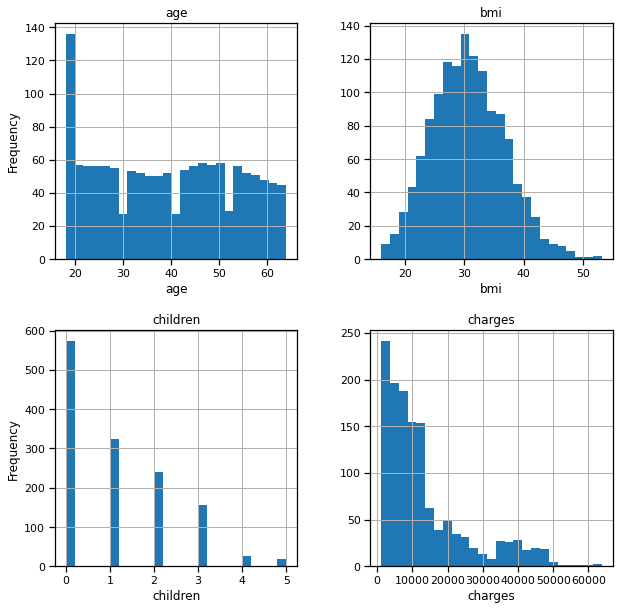

In [372]:
axList = insurance_df.hist(bins=25, figsize=(10,10))

for ax in axList.flatten():
    ax.set_xlabel(ax.title.get_text())
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

In [373]:
normaltest(insurance_df.charges.values)

NormaltestResult(statistic=336.4416065386955, pvalue=8.762608303862979e-74)

We see how the **charges** variables would look like after the box cox transformation.

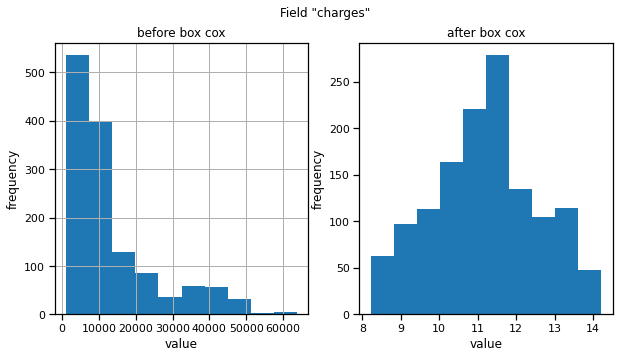

In [374]:
field = 'charges'

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
insurance_df[field].hist(ax=ax_before)

# Apply a box cox transformation (numpy syntax) to this column
bc_result = boxcox(insurance_df.charges.values)
boxcox_medv = bc_result[0]
lam = bc_result[1]

ax_after.hist(boxcox_medv)

# Formatting of titles etc. for each subplot
ax_before.set(title='before box cox', ylabel='frequency', xlabel='value')
ax_after.set(title='after box cox', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [375]:
insurance_df[field] = boxcox_medv
insurance_df[field]

0       12.120634
1        8.804026
2       10.141549
3       12.526076
4        9.939887
          ...    
1332    11.416735
1333     9.145579
1334     8.725190
1335     9.014352
1336    12.964199
Name: charges, Length: 1337, dtype: float64

It can be seen that after the box cox transformation the variable is no longer positively skewed.

In [376]:
insurance_df.skew()

C:\Users\sumit\AppData\Local\Temp/ipykernel_5456/713582286.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  insurance_df.skew()


age         0.054781
bmi         0.283914
children    0.937421
charges    -0.008674
dtype: float64

In [377]:
normaltest(insurance_df.charges.values)

NormaltestResult(statistic=53.89147995320849, pvalue=1.9843296302159134e-12)

We now proceed with the treatment of the categorical variables.

In [378]:
# One-Hot encoding for region
insurance_df = pd.get_dummies(insurance_df, columns=['region'], drop_first=True)

In [379]:
# Binary encoding for sex
le = LabelEncoder()
le.fit(insurance_df.sex.drop_duplicates()) 
insurance_df.sex = le.transform(insurance_df.sex)
# Binary encoding for smoker or not
le.fit(insurance_df.smoker.drop_duplicates()) 
insurance_df.smoker = le.transform(insurance_df.smoker)

In [380]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,12.120634,0,0,1
1,18,1,33.770,1,0,8.804026,0,1,0
2,28,1,33.000,3,0,10.141549,0,1,0
3,33,1,22.705,0,0,12.526076,1,0,0
4,32,1,28.880,0,0,9.939887,1,0,0


### Advanced Data Exploration (EDA)

We start by visualising the correlations of each variable with our target variable: **charges**. As can be seen, the variables: **region** and **sex** do not seem to be correlated with our predictor variable.

In [381]:
insurance_df.corr()['charges'].sort_values()

region_southwest   -0.042775
region_northwest   -0.016868
sex                 0.010034
region_southeast    0.018186
bmi                 0.135932
children            0.155338
age                 0.517763
smoker              0.675832
charges             1.000000
Name: charges, dtype: float64

We now proceed to visualise the correlation matrix for all our variables.

C:\Users\sumit\AppData\Local\Temp/ipykernel_5456/2643460924.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


<AxesSubplot:>

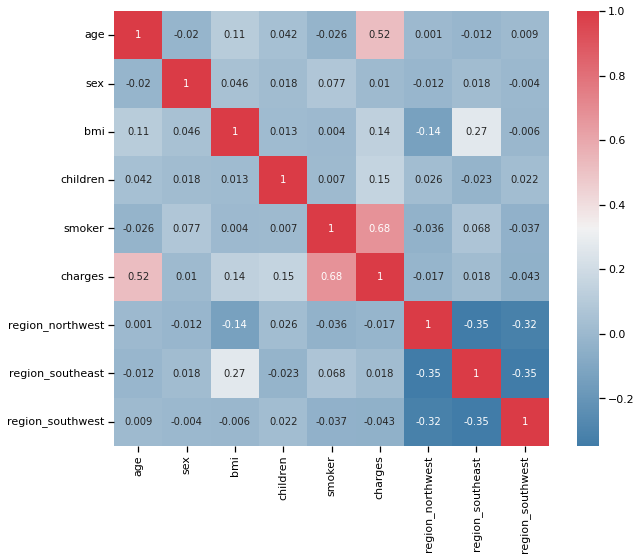

In [382]:
f, ax = plt.subplots(figsize=(10, 8))
corr = insurance_df.corr().round(3)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, annot=True, ax=ax)

Smoking patients spend more on treatment.

C:\Users/sumit/OneDrive/Escritorio/Universidad/aprendizaje-automatico-IBM/venv/Lib/site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users/sumit/OneDrive/Escritorio/Universidad/aprendizaje-automatico-IBM/venv/Lib/site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of charges for non-smokers')

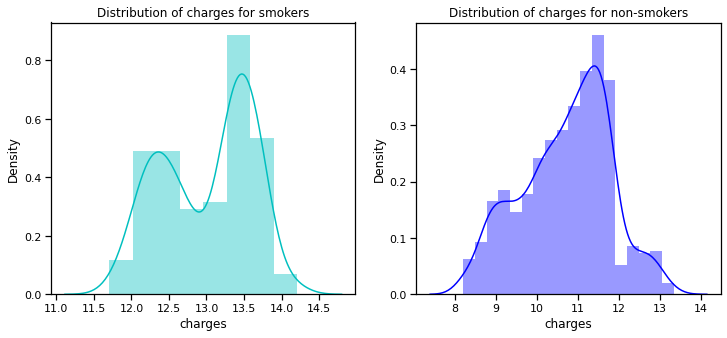

In [383]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(insurance_df[(insurance_df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(insurance_df[(insurance_df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Please note that women are coded with the symbol "0" and men - "1". Thus non-smoking people and the truth more. Also we can notice that there are more male smokers than female smokers.

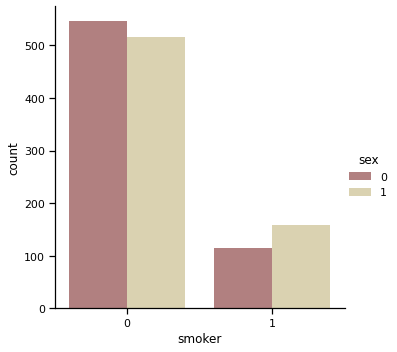

In [384]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=insurance_df)

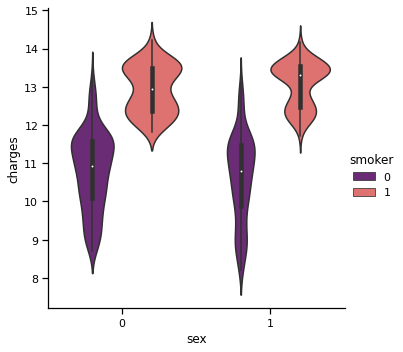

In [385]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=insurance_df, palette = 'magma')

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

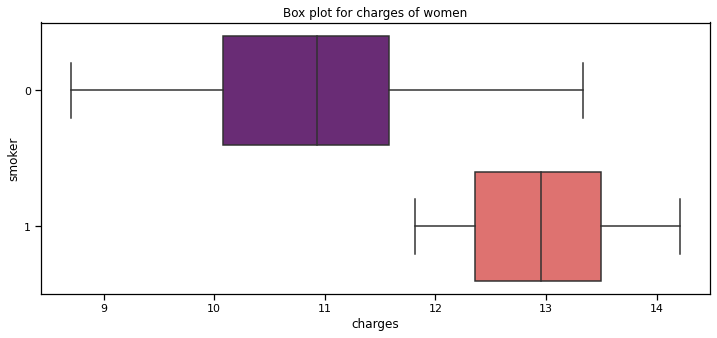

In [386]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  insurance_df[(insurance_df.sex == 0)] , orient="h", palette = 'magma')

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

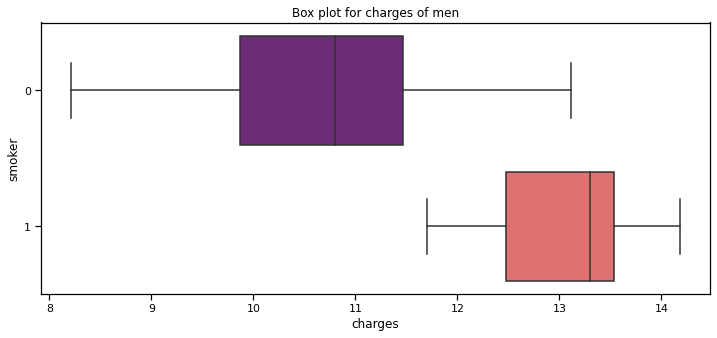

In [387]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  insurance_df[(insurance_df.sex == 1)] , orient="h", palette = 'magma')

Now let's pay attention to the age of the patients. First, let's look at how age affects the cost of treatment, and also look at patients of what age more in our data set.

We have patients under 20 in our data set. The minimum age of patients in our set is 18. The maximum age is 64 years.

C:\Users/sumit/OneDrive/Escritorio/Universidad/aprendizaje-automatico-IBM/venv/Lib/site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


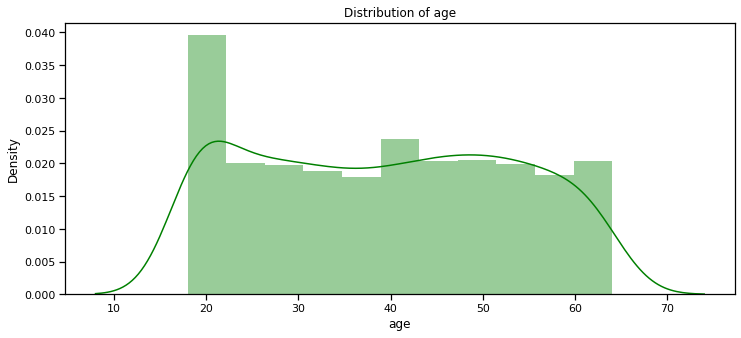

In [388]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(insurance_df["age"], color = 'g')

Now let's see how the cost of treatment depends on the age of smokers and non-smokers patients

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

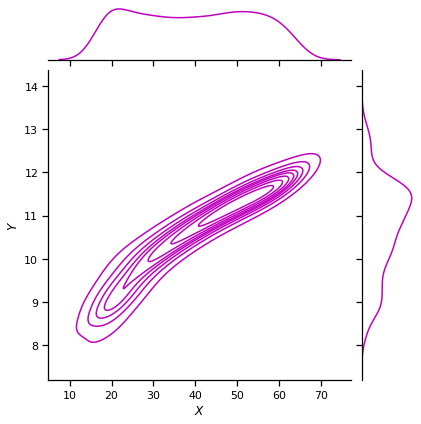

In [389]:
g = sns.jointplot(x="age", y="charges", data=insurance_df[(insurance_df.smoker == 0)],kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

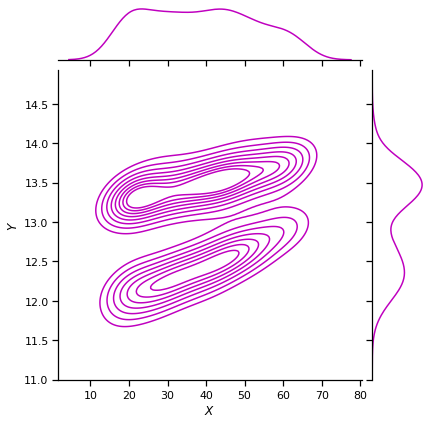

In [390]:
g = sns.jointplot(x="age", y="charges", data=insurance_df[(insurance_df.smoker == 1)],kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

In [391]:
#non - smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=insurance_df[(insurance_df.smoker == 0)].age,y=insurance_df[(insurance_df.smoker == 0)].charges, size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)

show(p)

In [392]:
#smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=insurance_df[(insurance_df.smoker == 1)].age,y=insurance_df[(insurance_df.smoker == 1)].charges, size=7, line_color="navy", fill_color="red", fill_alpha=0.9)

show(p)

In **non-smokers**, the cost of treatment increases with age. In smoking people, we do not see such dependence.

C:\Users/sumit/OneDrive/Escritorio/Universidad/aprendizaje-automatico-IBM/venv/Lib/site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function seaborn.regression.lmplot(*, x=None, y=None, data=None, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=None, sharey=None, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, facet_kws=None, size=None)>

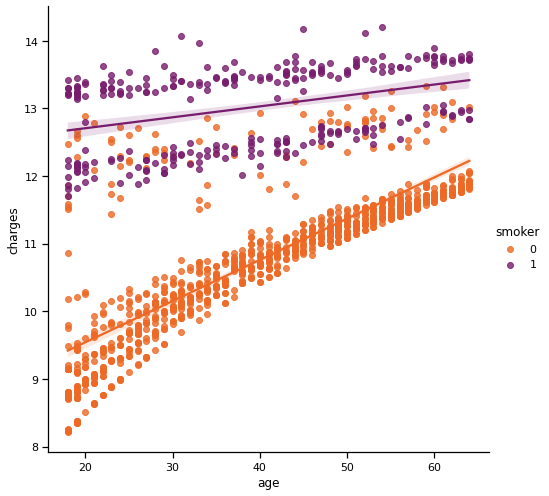

In [393]:
sns.lmplot(x="age", y="charges", hue="smoker", data=insurance_df, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')
sns.lmplot

Let's pay attention to **bmi**.

C:\Users/sumit/OneDrive/Escritorio/Universidad/aprendizaje-automatico-IBM/venv/Lib/site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


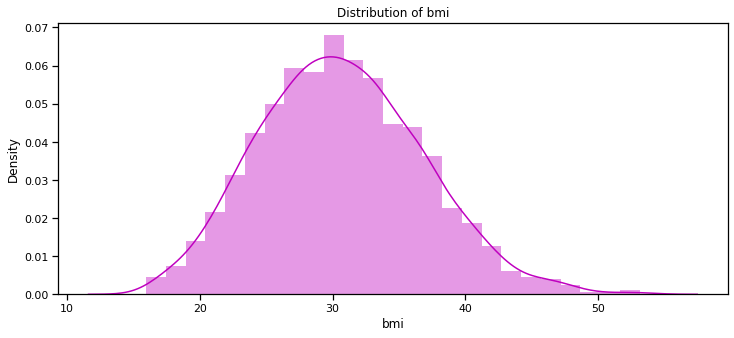

In [394]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(insurance_df["bmi"], color = 'm')

With a value equal to 30 starts obesity. Let's look at the distribution of costs in patients with BMI greater than 30 and less than 30.

Patients with BMI above 30 spend more on treatment!

C:\Users/sumit/OneDrive/Escritorio/Universidad/aprendizaje-automatico-IBM/venv/Lib/site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


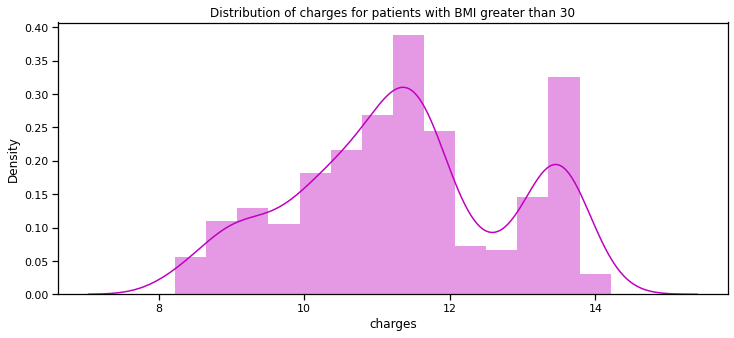

In [395]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(insurance_df[(insurance_df.bmi >= 30)]['charges'], color = 'm')

C:\Users/sumit/OneDrive/Escritorio/Universidad/aprendizaje-automatico-IBM/venv/Lib/site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


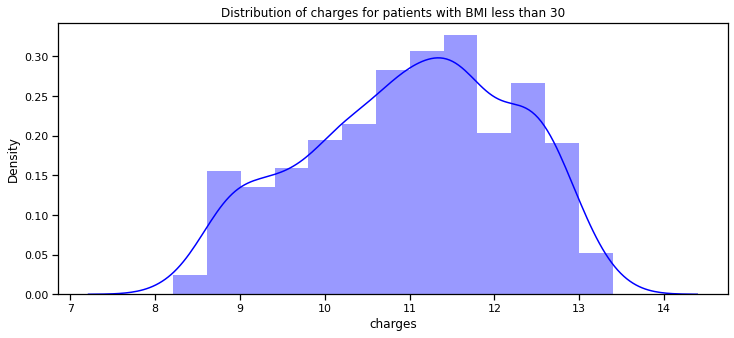

In [396]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(insurance_df[(insurance_df.bmi < 30)]['charges'], color = 'b')

C:\Users/sumit/OneDrive/Escritorio/Universidad/aprendizaje-automatico-IBM/venv/Lib/site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


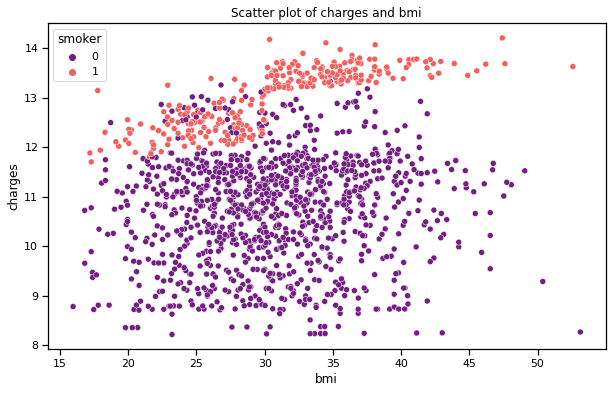

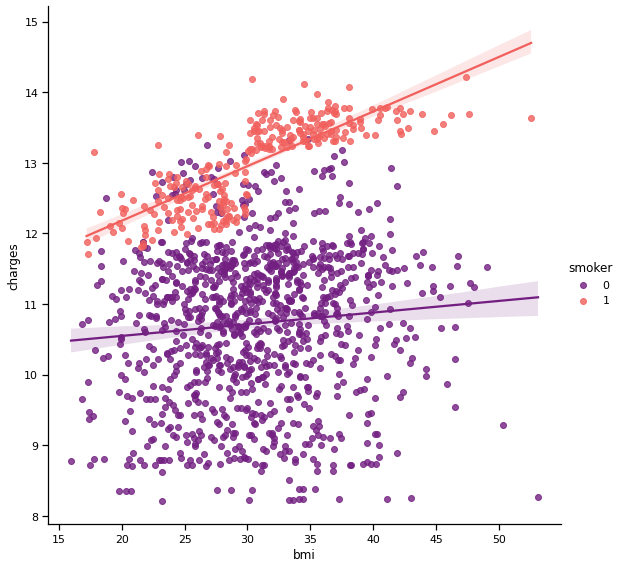

In [397]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=insurance_df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_df, palette = 'magma', size = 8)

Let's pay attention to children. First, let's see how many children our patients have.

Most patients do not have children. Perfectly that some have 5 children!

C:\Users/sumit/OneDrive/Escritorio/Universidad/aprendizaje-automatico-IBM/venv/Lib/site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


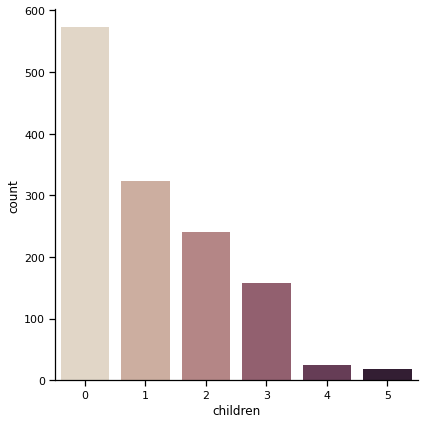

In [398]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=insurance_df, size = 6)

C:\Users/sumit/OneDrive/Escritorio/Universidad/aprendizaje-automatico-IBM/venv/Lib/site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

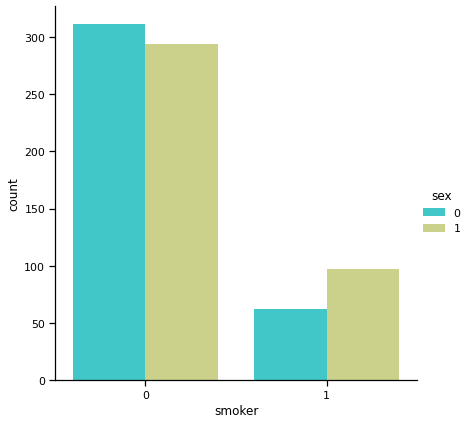

In [399]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=insurance_df[(insurance_df.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

## Linear Regressions

### Simple linear regression

We start by separating the variable to be predicted (charges) from the rest.

In [698]:
X = insurance_df.drop('charges', axis=1)
y = insurance_df.charges

In [699]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    shuffle=True, test_size=0.2)

In [700]:
kf = KFold(shuffle=True, n_splits=3)

In [701]:
simple_lr = LinearRegression()

We don't scale the training data, as it is a simple linear regression

In [702]:
predictions = cross_val_predict(simple_lr, X_train, y_train, cv=kf)

In [703]:
predictions[:10]

array([10.78875521, 10.65070071, 11.21822226,  9.50122249, 10.7211276 ,
       11.7160676 , 13.3563894 , 10.11590628, 12.46859031, 12.95697333])

In [704]:
r2_score(y_train, predictions)

0.7581276440077181

In [705]:
simple_lr.fit(X_train, y_train)

LinearRegression()

In [706]:
y_pred = simple_lr.predict(X_test)

In [707]:
r2_score(y_test, y_pred)

0.7806591544070264

[Text(0.5, 0, 'Ground truth'),
 Text(0, 0.5, 'Predictions'),
 Text(0.5, 1.0, 'Charges Price Predictions vs Truth, using Linear Regression')]

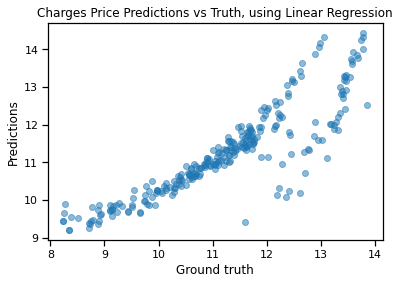

In [708]:
ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Charges Price Predictions vs Truth, using Linear Regression')

### Simple linear regression with polynomial effects

In [709]:
pf = PolynomialFeatures(degree=2, include_bias=False)

estimator = Pipeline([
        ("make_higher_degree", pf),
        ("regression", simple_lr)])

In [710]:
predictions_pf = cross_val_predict(estimator, X_train, y_train, cv=kf)

In [711]:
predictions_pf[:10]

array([10.7244427 , 10.93534399, 11.36157972,  9.70550574, 10.64297509,
       12.27483534, 13.24061718, 10.45261102, 12.80476856, 13.07455764])

As can be seen, adding polynomial features improves the r2_score.

In [712]:
r2_score(y_train, predictions_pf)

0.8185525272004777

In [713]:
estimator.fit(X_train, y_train)

Pipeline(steps=[('make_higher_degree', PolynomialFeatures(include_bias=False)),
                ('regression', LinearRegression())])

In [714]:
y_pred = estimator.predict(X_test)

In [715]:
r2_score(y_test, y_pred)

0.8664325970624178

[Text(0.5, 0, 'Ground truth'),
 Text(0, 0.5, 'Predictions'),
 Text(0.5, 1.0, 'Charges Price Predictions vs Truth, using Linear Regression')]

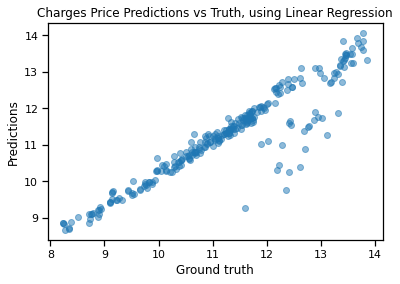

In [716]:
ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Charges Price Predictions vs Truth, using Linear Regression')

### Ridge regression with polynomial effects

In [717]:
estimator = Pipeline([("polynomial_features", PolynomialFeatures()),
        ("scaler", StandardScaler()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(0.1, 3, 30)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [718]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([0.1       , 0.11244372, 0.12643591, 0.14216924, 0.15986039,
       0.17975297, 0.20212093, 0.2272723 , 0.25555344, 0.2873538 ,
       0.32311131, 0.36331838, 0.40852872, 0.4593649 , 0.51652699,
       0.58080218, 0.65307559, 0.7343425 , 0.82572205, 0.92847261,
       1.04400917, 1.17392278, 1.32000247, 1.48425992, 1.66895711,
       1.87663751, 2.11016108, 2.37274367, 2.66800131, 3.        ])})

In [719]:
grid.best_score_, grid.best_params_

(0.81918175086285,
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': 2.1101610754889344})

In [720]:
y_predict = grid.predict(X_test)

In [721]:
r2_score(y_test, y_predict)

0.8653882357401671

[Text(0.5, 0, 'Ground truth'),
 Text(0, 0.5, 'Predictions'),
 Text(0.5, 1.0, 'Charges Price Predictions vs Truth, using Linear Regression')]

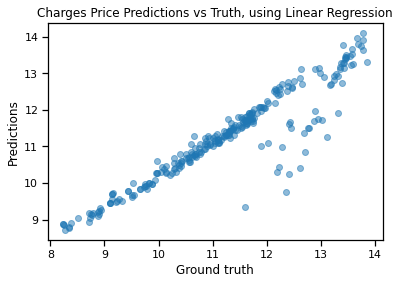

In [722]:
ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_predict, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Charges Price Predictions vs Truth, using Linear Regression')

## Recommended regression and Summary Key Findings and Insights

Of the regressions tested, those including polynomial features (degree=2) are recommended as they provide a better generalisation of the model compared to a simple regression. A ridge regression has also been tested but does not provide a significant improvement.

## Suggestions for next steps in analyzing this data

Nothing to contribute...